In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
column_name=['user_id','item_id','rating','timestamp']

In [ ]:
df=pd.read_csv('/content/u.data',sep='\t',names=column_name)

In [ ]:
movie_titles=pd.read_csv('/content/Movie_Id_Titles')

In [ ]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
df=pd.merge(df,movie_titles, on='item_id')
df.head(20)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [ ]:
sns.set_style('white')

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [ ]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [ ]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [ ]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
ratings['no. of ratings']=df.groupby('title')['rating'].count().sort_values(ascending=False)

In [ ]:
ratings

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<Axes: >

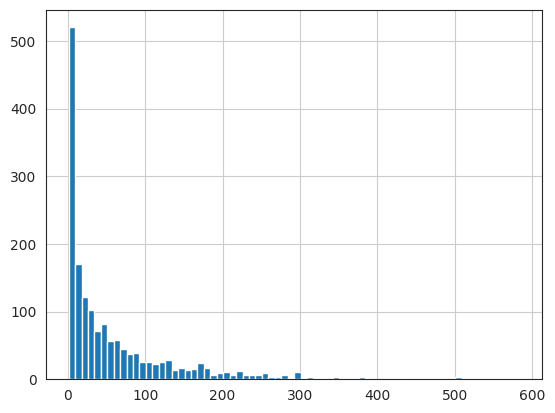

In [ ]:
ratings['no. of ratings'].hist(bins=70)

<Axes: >

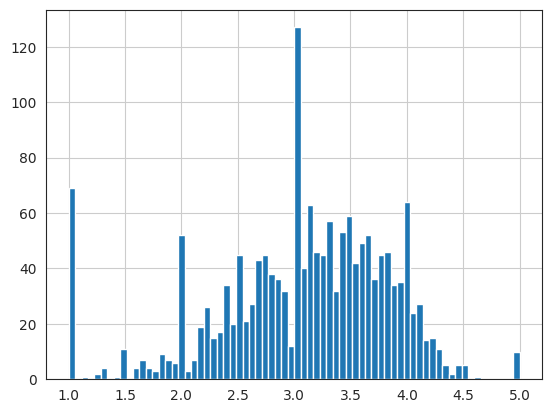

In [ ]:
ratings['rating'].hist(bins=70)

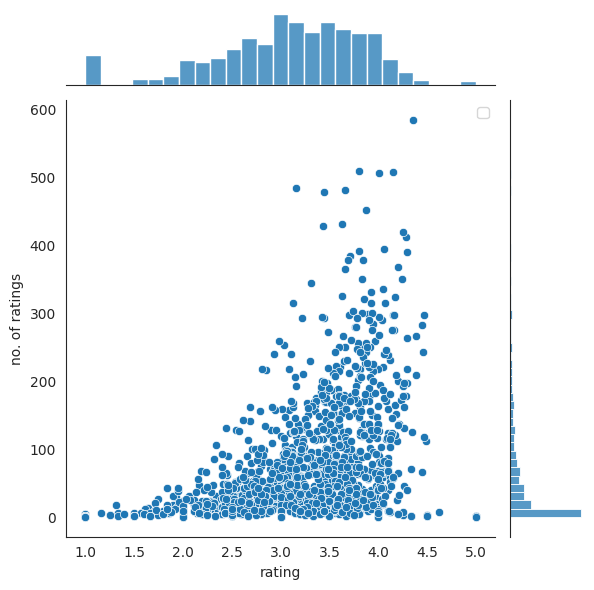

In [ ]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings)
plt.legend()

In [ ]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [ ]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
reviews_n=moviemat.count(axis=1)
reviews_n.sort_values(ascending=False)

user_id
405    736
655    678
13     632
450    538
276    516
      ... 
147     20
475     20
93      20
300     19
0        3
Length: 944, dtype: int64

In [ ]:
ratings.sort_values('no. of ratings',ascending=False).head(10)

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
starwars_user_ratings= moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [ ]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [ ]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_to_starwars.sort_values(ascending=False)

title
Hollow Reed (1996)                         1.0
Commandments (1997)                        1.0
Cosi (1996)                                1.0
No Escape (1994)                           1.0
Stripes (1981)                             1.0
                                          ... 
Wonderland (1997)                          NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1664, dtype: float64

In [ ]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_to_liarliar.sort_values(ascending=False)

title
Bonheur, Le (1965)                                          1.0
For Ever Mozart (1996)                                      1.0
Crossfire (1947)                                            1.0
Johnny 100 Pesos (1993)                                     1.0
Moonlight and Valentino (1995)                              1.0
                                                           ... 
Wonderful, Horrible Life of Leni Riefenstahl, The (1993)    NaN
World of Apu, The (Apur Sansar) (1959)                      NaN
Yankee Zulu (1994)                                          NaN
You So Crazy (1994)                                         NaN
Á köldum klaka (Cold Fever) (1994)                          NaN
Length: 1664, dtype: float64

In [ ]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [ ]:
corr_starwars=corr_starwars.join(ratings['no. of ratings'])

In [ ]:
corr_starwars

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [ ]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [ ]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [ ]:
corr_liarliar.dropna(inplace=True)
corr_liarliar=corr_liarliar.join(ratings['no. of ratings'])

In [ ]:
corr_liarliar[corr_liarliar['no. of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,no. of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
